# **DSL 24-2 기초 과제 1**

### 기수 : 12기
### 이름 : 김민규

In [1]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
# from google.colab import drive
# drive.mount('/content/drive')

필수 라이브러리 갖고오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [3]:
path_to_image = "./data//image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

In [4]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize = (10, 13))
plt.imshow(image, cmap = 'gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [5]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [6]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


여기서부터는 해당 이미지에 관해서 고유벡터 $70$개만 쓰겠습니다. (즉, 나머지 원소들은 $0$)

In [7]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize = (10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [8]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number = 100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number = 100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 3.79713 seconds
Processing Time for 10 Compressed Images: 0.25449 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다. 
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [9]:
path_to_image = "./data/japan.PNG"

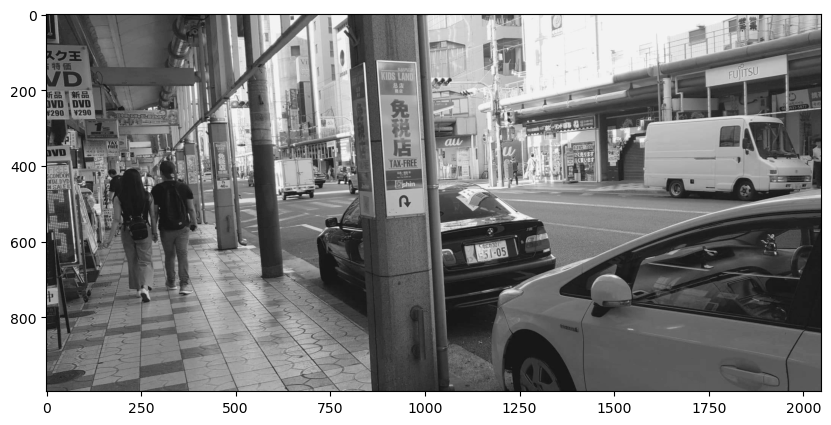

In [10]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize = (10, 13))
plt.imshow(image, cmap='gray')

In [11]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (996, 2048)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [12]:
num_elements = 50

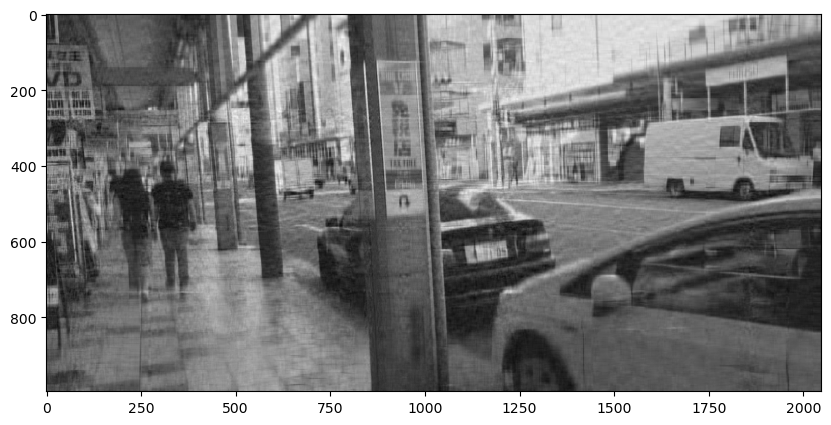

In [13]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize = (10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [14]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number = 100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number = 100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  5187316  Non-zero Elements
Image Composition uses  213150  Non-zero Elements
Processing Time for 10 Full Images: 19.18336 seconds
Processing Time for 10 Compressed Images: 0.70728 seconds


## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [15]:
path_to_csv = "./data/heights.csv"

전처리

In [16]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [17]:
DSL.head()

heights which
0    181.8   DSL
1    161.3   DSL
2    177.8   DSL
3    169.1   DSL
4    181.2   DSL

ESC 데이터 형태

In [18]:
ESC.head()

heights which
78    171.1   ESC
79    159.2   ESC
80    184.9   ESC
81    176.1   ESC
82    184.8   ESC

Else 데이터 형태

In [19]:
Else.head()

heights which
141    180.6  Else
142    169.3  Else
143    176.0  Else
144    180.3  Else
145    177.7  Else

#### (a) 귀무가설과 대립가설을 설정하시오.
DSL 학회원들의 평균키를 $\mu_1$, ESC 학회원들의 평균키를 $\mu_2$, 어느 학회도 아닌 사람들의 평균키를 $\mu_3$라 할 때,

$H_0$ : $\mu_1$ = $\mu_2$ = $\mu_3$ vs. $H_1$ : not $H_0$

#### (b) 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

In [20]:
_, p_value = stats.f_oneway(DSL['heights'], ESC['heights'], Else['heights'])
p_value

0.0013059664602332191

In [21]:
result = p_value <= 0.05

print(f"DSL: {DSL['heights'].mean():.2f}")
print(f"ESC : {ESC['heights'].mean():.2f}")
print(f"ELSE : {Else['heights'].mean():.2f}")
print(f"p = {p_value:.4f}")
print(f"There was significant difference: {result}")

DSL: 173.36
ESC : 176.41
ELSE : 172.27
p = 0.0013
There was significant difference: True


따라서, 세 집단 간 평균 키의 차이가 있다고 말할 수 있다.

## **문제 6**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [22]:
import pandas as pd

path_to_csv = "./data/train.csv"
data = pd.read_csv(path_to_csv)

In [23]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

In [24]:
# TO-DO

# 1. Name 변수에 대한 전처리
# 2. 전처리 한 변수를 다시 dataframe에 추가
data['filteredName'] = data['Name'].str.split(',', expand = True)[0]

data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked filteredName  
0      0         A/5 21171   7.2500   NaN        S       Braund  
1      0          PC 17599  71.2833   C85        C      Cumings  
2      0  STON/O2. 3101282   7.9250   NaN        S    Heikkinen  
3      0            113803  53.1000  C123        S     Futrelle  
4      0            373450   8.0500   NaN        S        Allen  
5      0            330877   8.4583   NaN        Q        Moran  
6      0             17463  51.8625   E46        S     McCarthy  
7      1            349909  21.0750   NaN        S      Palsson  
8      2            347742  11.1333   NaN        S      Johnson  
9      0            237736  30.0708   NaN        C       Nasser

6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [25]:
# TO-DO

# 정렬
data = data.sort_values("Age") # df.sort_values(column_name) : 해당 데이터프레임을 column 기준으로 오름차순 정렬
data.head(10)

PassengerId  Survived  Pclass                             Name     Sex  \
803          804         1       3  Thomas, Master. Assad Alexander    male   
755          756         1       2        Hamalainen, Master. Viljo    male   
644          645         1       3           Baclini, Miss. Eugenie  female   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
78            79         1       2    Caldwell, Master. Alden Gates    male   
831          832         1       2  Richards, Master. George Sibley    male   
305          306         1       1   Allison, Master. Hudson Trevor    male   
827          828         1       2            Mallet, Master. Andre    male   
381          382         1       3      Nakid, Miss. Maria ("Mary")  female   
164          165         0       3     Panula, Master. Eino Viljami    male   

      Age  SibSp  Parch           Ticket      Fare    Cabin Embarked  \
803  0.42      0      1             2625    8.5167      NaN        C   
755  0.67      1      1           250649   14.5000      NaN        S   
644  0.75      2      1             2666   19.2583      NaN        C   
469  0.75      2      1             2666   19.2583      NaN        C   
78   0.83      0      2           248738   29.0000      NaN        S   
831  0.83      1      1            29106   18.7500      NaN        S   
305  0.92      1      2           113781  151.5500  C22 C26        S   
827  1.00      0      2  S.C./PARIS 2079   37.0042      NaN        C   
381  1.00      0      2             2653   15.7417      NaN        C   
164  1.00      4      1          3101295   39.6875      NaN        S   

    filteredName  
803       Thomas  
755   Hamalainen  
644      Baclini  
469      Baclini  
78      Caldwell  
831     Richards  
305      Allison  
827       Mallet  
381        Nakid  
164       Panula

6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

In [26]:
# TO-DO

# 1. Cabin 변수의 값 종류 확인
count = data["Cabin"].value_counts(dropna = False)
count

Cabin
NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
C118             1
E68              1
C32              1
C62 C64          1
C47              1
Name: count, Length: 148, dtype: int64

대부분의 데이터가 Cabin 데이터에 대해 결측치인 것으로 보여, 여기서는 결측치인 값과 아닌 값으로 나누어 히스토그램을 그려본다.

<Axes: xlabel='Cabin', ylabel='count'>

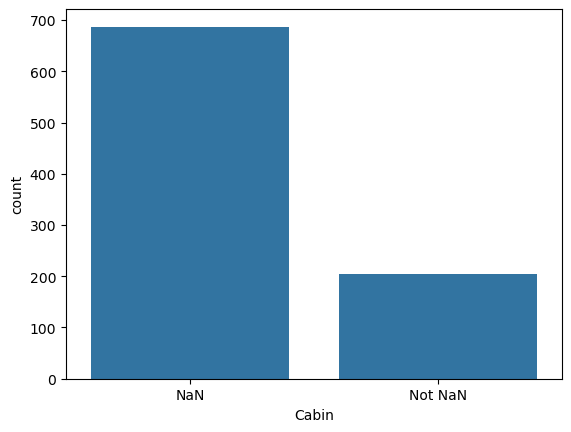

In [27]:
import seaborn as sns

Cabin = data[["Cabin", "Survived"]]
Cabin.loc[Cabin["Cabin"].notna(), "Cabin"] = "Not NaN"
Cabin.loc[Cabin["Cabin"].isna(), "Cabin"] = "NaN"

# 2. 히스토그램 시각화
sns.countplot(Cabin, x = "Cabin")

따라서 해당 data의 경우 Cabin 변수에 대해 결측치가 매우 많은 것을 시각적으로 확인할 수 있다.

6-4. (Optional) 

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 Survived 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

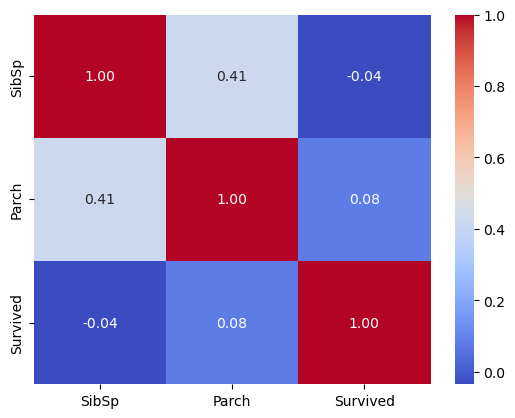

In [28]:
figure = sns.heatmap(data[["SibSp", "Parch", "Survived"]].corr(), cmap = "coolwarm", annot = True, fmt = ".2f") # Visualize correlation by heatmap

둘 다 Survived 값과 상관관계가 그리 높지 않으나, 비교하면 그나마 Parch와의 상관 관계가 높기 때문에 **Parch** 변수를 선택하는 것이 더 적절해 보인다.

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [29]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)

# TO-DO
arr_ul = np.reshape(arr[:2, :2], (2, 2))
arr_dl = np.reshape(arr[1:, :2], (2, 2))
arr_ur = np.reshape(arr[:2, 1:], (2, 2))
arr_dr = np.reshape(arr[1:, 1:], (2, 2))

new_arr = np.array([arr_ul, arr_dl, arr_ur, arr_dr])
new_arr

array([[[1, 2],
        [4, 5]],

       [[4, 5],
        [7, 8]],

       [[2, 3],
        [5, 6]],

       [[5, 6],
        [8, 9]]])

In [30]:
new_arr.shape

(4, 2, 2)

6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.

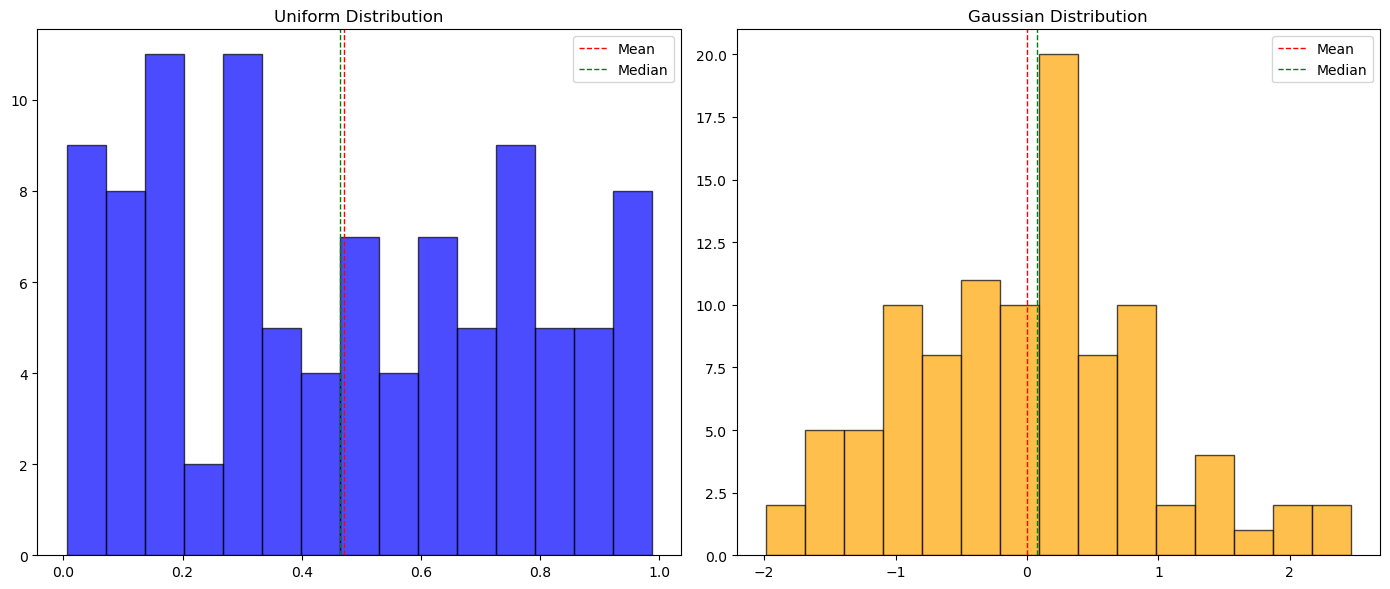

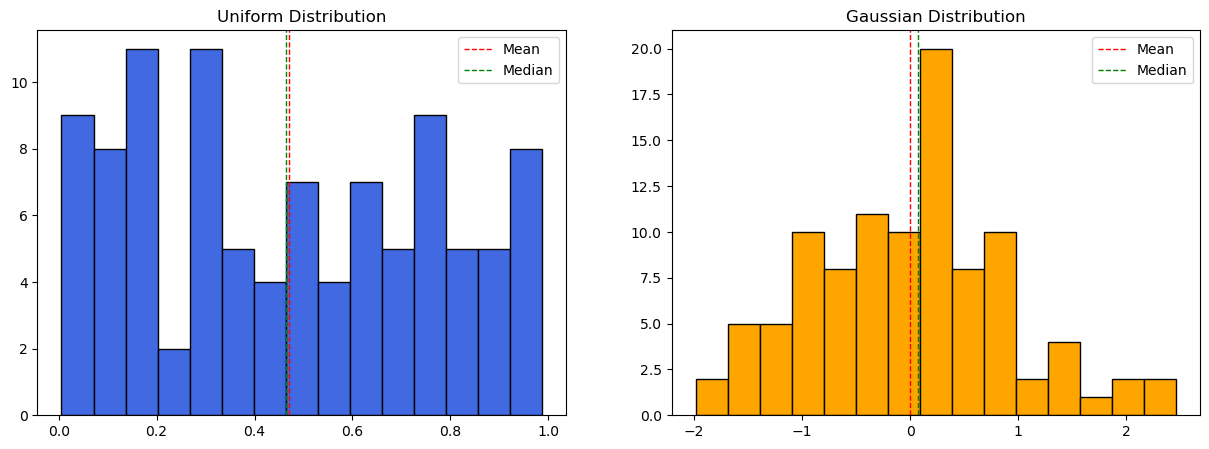

In [31]:
# TO-DO

np.random.seed(42) # Fixing the result

# 1. Uniform Distribution으로부터 100개의 점 Sampling
samples_unif = np.random.uniform(size = 100) # Default options for this method is U(0, 1).

# 2. Gaussian Distribution으로부터 100개의 점 Sampling
samples_gauss = np.random.normal(size = 100) # Default options for this method is N(0, 1).

# 3. 시각화
fig, axes = plt.subplots(1, 2, figsize = (15, 5)) # 2x2

axes[0].hist(samples_unif, color = 'royalblue', bins = 15, edgecolor = 'black')
axes[0].set_title('Uniform Distribution')

axes[1].hist(samples_gauss, color = 'orange', bins = 15, edgecolor = 'black')
axes[1].set_title('Gaussian Distribution')

# 4. 평균/중앙값 점선으로 시각화
axes[0].axvline(samples_unif.mean(), color = 'red', linestyle = '--', label = 'Mean', linewidth = 1)
axes[0].axvline(np.median(samples_unif), color = 'green', linestyle = '--', label = 'Median', linewidth = 1)
axes[0].legend()

axes[1].axvline(samples_gauss.mean(), color = 'red', linestyle = '--', label = 'Mean', linewidth = 1)
axes[1].axvline(np.median(samples_gauss), color = 'green', linestyle = '--', label = 'Median', linewidth = 1)
axes[1].legend()

plt.show()